# Data@ANZ Virtual Internship

by Deep Contractor


# Background Information:

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.



# Task 1: EDA

○ Load the transaction dataset below into an analysis tool of your choice (Excel, R, SAS, Tableau, or similar)

○ Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?

○ Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?

○ Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

○ For a challenge – what insights can you draw from the location information provided in the dataset?



In [344]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border-style: solid;
}

# Importing Libraries

In [345]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [346]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [347]:
df.to_csv('ANZ.csv')

In [348]:
df = pd.read_csv('ANZ.csv')
del df['Unnamed: 0']

In [349]:
df

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


## Describing Data

In [350]:
df.shape

(12043, 23)

In [351]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null object
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 non-null 

In [353]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

# EDA (Exploratory Data Analysis)

In [354]:
type(df['date'])

pandas.core.series.Series

In [355]:
df['date'] = pd.to_datetime(df['date'])

In [356]:
df['weekday'] = df['date'].dt.day_name()

In [357]:
df.weekday.head(5)

0    Wednesday
1    Wednesday
2    Wednesday
3    Wednesday
4    Wednesday
Name: weekday, dtype: object

In [358]:
df['month_name'] = df['date'].dt.month_name() 

In [359]:
df['month_name'].head()

0    August
1    August
2    August
3    August
4    August
Name: month_name, dtype: object

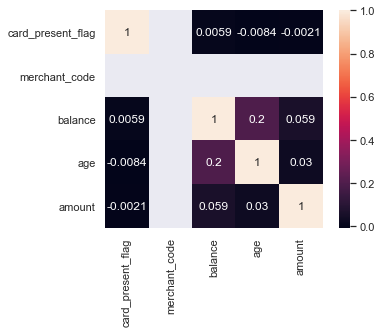

In [360]:
corrmat = df.corr()
ax = sns.heatmap(corrmat, annot=True, square = True)

> ### Now lets find some insights by doing some high level analysis
- Whats the average transaction for each month
- Also lets find out the maximum and minimum transaction for each month


In [361]:
oct_data = df[df['month_name'] == 'October'] 
oct_data.loc[:,'amount'].mean()

196.42732321996542

In [362]:
oct_data.loc[:,'amount'].max()

8835.98

In [363]:
oct_data.loc[:,'amount'].min()

0.1

In [364]:
sep_data = df[df['month_name'] == 'September'] 
sep_data.loc[:,'amount'].mean()

182.04590331422853

In [365]:
sep_data.loc[:,'amount'].max()

8835.98

In [366]:
sep_data.loc[:,'amount'].min()

0.1

In [367]:
aug_data = df[df['month_name'] == 'August'] 
aug_data.loc[:,'amount'].mean()

185.12186659903654

In [368]:
aug_data.loc[:,'amount'].max()

8835.98

In [369]:
aug_data.loc[:,'amount'].min()

1.52

### Monthly Transaction Analysis

> For the month of August
- Average Transaction :  185.12186659903654
- Maximum Transaction :  8835.98
- Minimum Transaction :  1.52
>

> For the month of september
- Average Transaction :  182.04590331422853
- Maximum Transaction :  8835.98
- Minimum Transaction :  0.1
>

> For the month of october
- Average Transaction :  196.42732321996542
- Maximum Transaction :  8835.98
- Minimum Transaction :  0.1
>


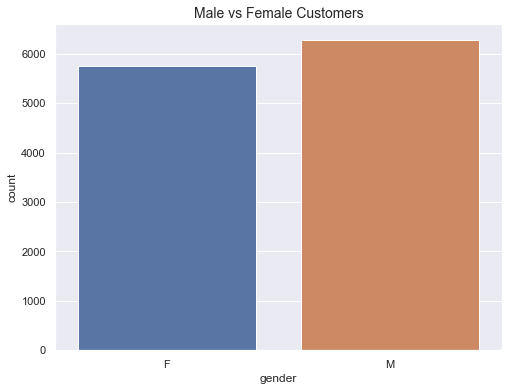

In [370]:
plt.figure(figsize=(8,6))
plt.title('Male vs Female Customers',fontdict = {'fontsize' : 14})
sns.countplot(df['gender'])

In [371]:
df['month_name'].value_counts()

October      4087
September    4013
August       3943
Name: month_name, dtype: int64

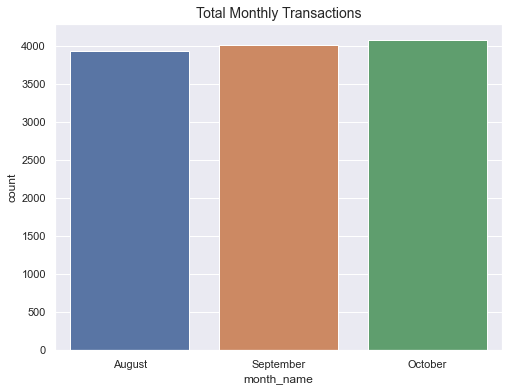

In [372]:
plt.figure(figsize=(8,6))
plt.title('Total Monthly Transactions',fontdict = {'fontsize' : 14})
sns.countplot(df['month_name'])

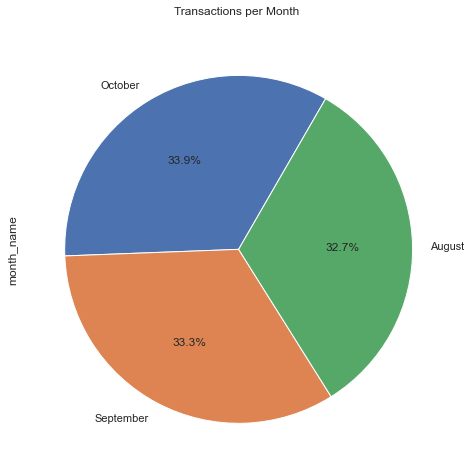

In [373]:
plt.figure(figsize=(8,8))
explode=(0.1,0.05,0.05)
df['month_name'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('Transactions per Month \n')
plt.show()


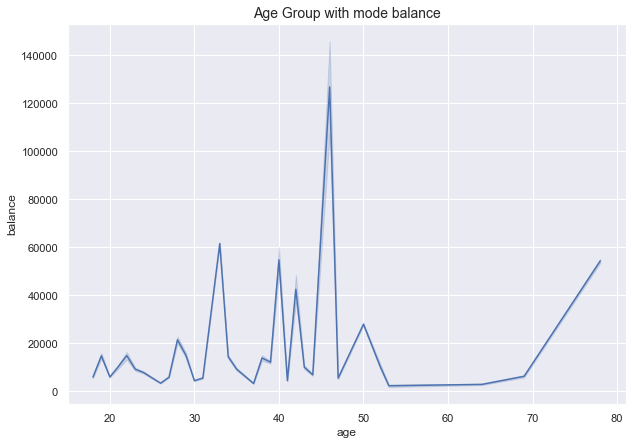

In [374]:
plt.figure(figsize=(10,7))
plt.title('Age Group with mode balance',fontdict = {'fontsize' : 14})
sns.lineplot(x='age' , y='balance' , data=df)

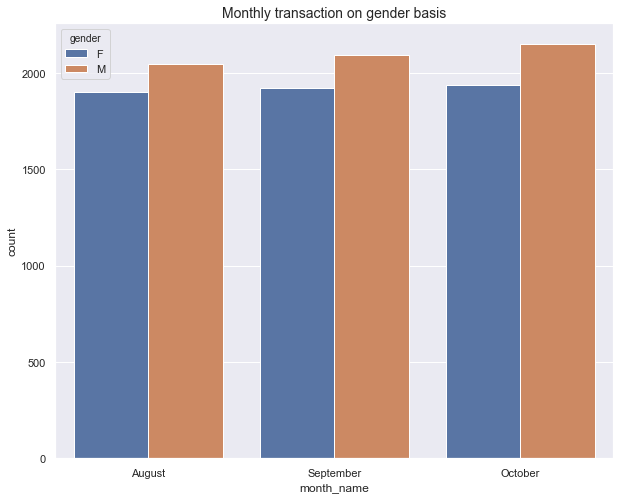

In [375]:
plt.figure(figsize=(10,8))
plt.title('Monthly transaction on gender basis',fontdict = {'fontsize' : 14})
sns.countplot(df['month_name'], hue=df['gender'])

In [376]:
df['weekday'].value_counts()

Friday       2073
Wednesday    2063
Thursday     1801
Saturday     1709
Sunday       1550
Tuesday      1487
Monday       1360
Name: weekday, dtype: int64

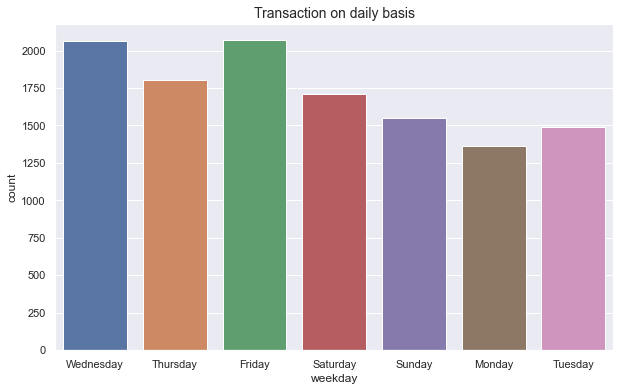

In [377]:
plt.figure(figsize=(10,6))
plt.title('Transaction on daily basis',fontdict = {'fontsize' : 14})
sns.countplot(df['weekday'])

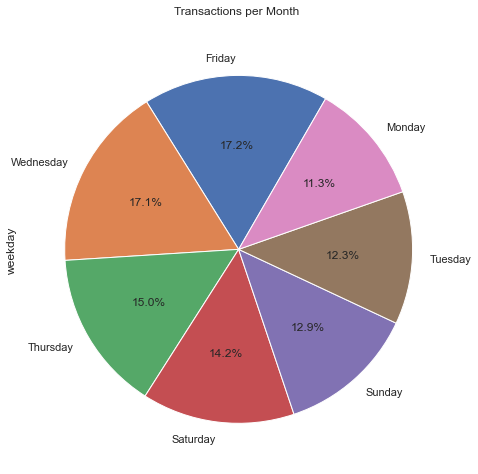

In [378]:
plt.figure(figsize=(8,8))
df['weekday'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('Transactions per Month \n')
plt.show()


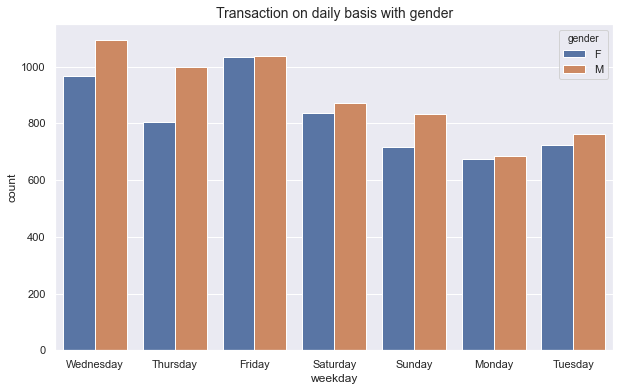

In [379]:
plt.figure(figsize=(10,6))
plt.title('Transaction on daily basis with gender',fontdict = {'fontsize' : 14})
sns.countplot(df['weekday'], hue=df['gender'])

In [380]:
df['card_present_flag'].value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

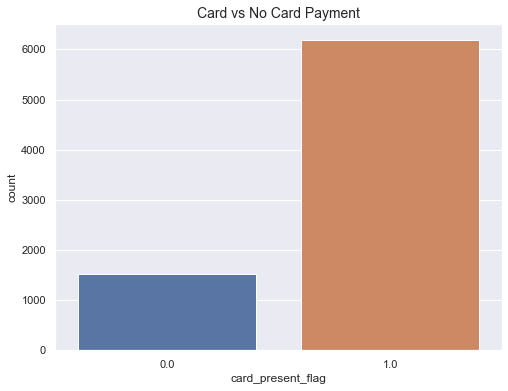

In [381]:
plt.figure(figsize=(8,6))
plt.title('Card vs No Card Payment',fontdict = {'fontsize' : 14})
sns.countplot(df['card_present_flag'])

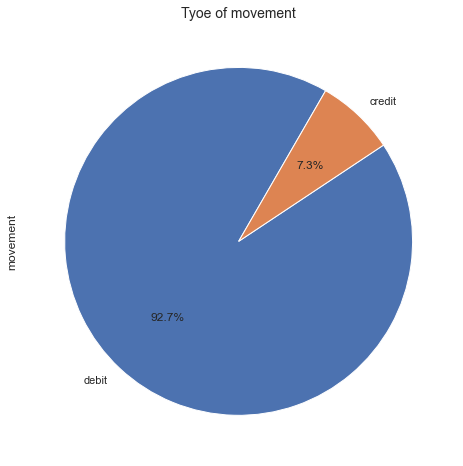

In [382]:
plt.figure(figsize=(8,8))
df['movement'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('Tyoe of movement',fontdict = {'fontsize' : 14})
plt.show()

In [383]:
df['movement'].value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

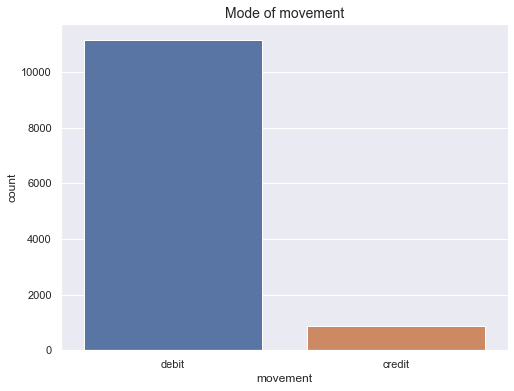

In [384]:
plt.figure(figsize=(8,6))
plt.title('Mode of movement',fontdict = {'fontsize' : 14})
sns.countplot(df['movement'])

In [385]:
df['merchant_state'].value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

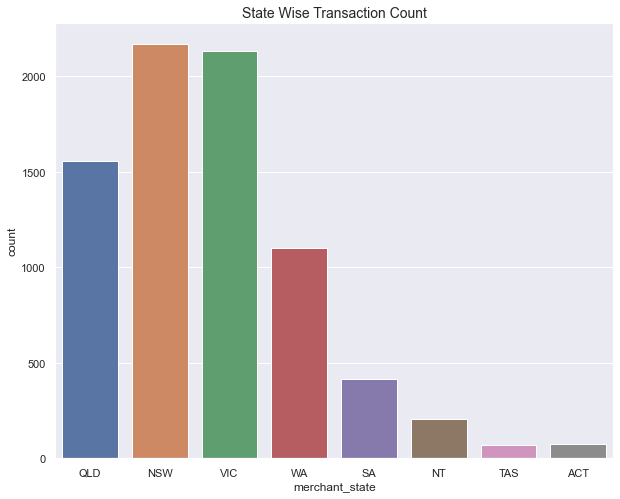

In [386]:
plt.figure(figsize=(10,8))
plt.title('State Wise Transaction Count',fontdict = {'fontsize' : 14})
sns.countplot(df['merchant_state'])

In [387]:
df['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

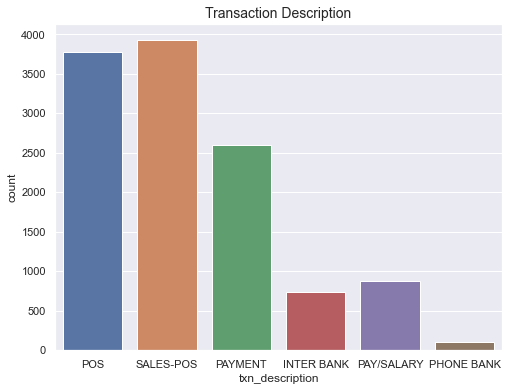

In [388]:
plt.figure(figsize=(8,6))
plt.title('Transaction Description',fontdict = {'fontsize' : 14})
sns.countplot(df['txn_description'])

In [389]:
topcustomer= df['first_name'].value_counts(sort=True).head(10)
topcustomer

Michael        746
Diana          578
Jessica        408
Joseph         391
Jeffrey        388
Richard        364
Kimberly       343
Tonya          292
Susan          282
Christopher    263
Name: first_name, dtype: int64

[Text(0, 0.5, 'Name'),
 Text(0.5, 0, 'Number of transaction made'),
 Text(0.5, 1.0, 'Top 10 Customer')]

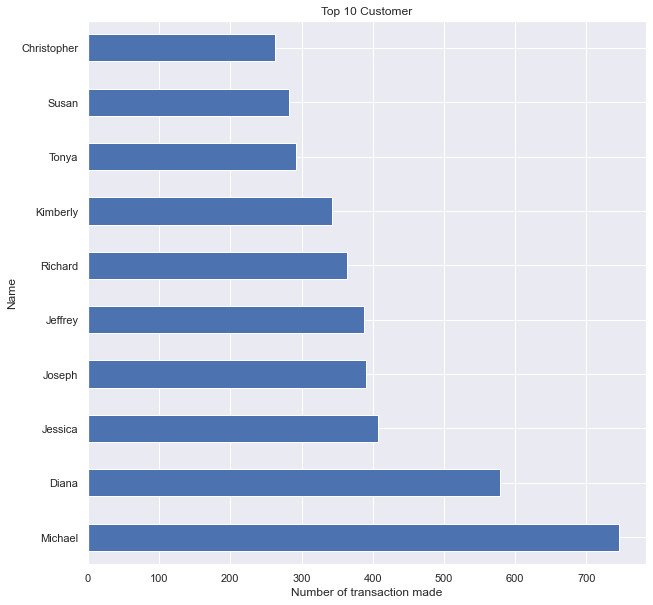

In [390]:
fig,ax = plt.subplots(figsize=(10,10)) # (height,width)
topcustomer.plot.barh()
ax.set(title="Top 10 Customer",
      xlabel="Number of transaction made",
      ylabel="Name")

## Some Time-Series Analysis

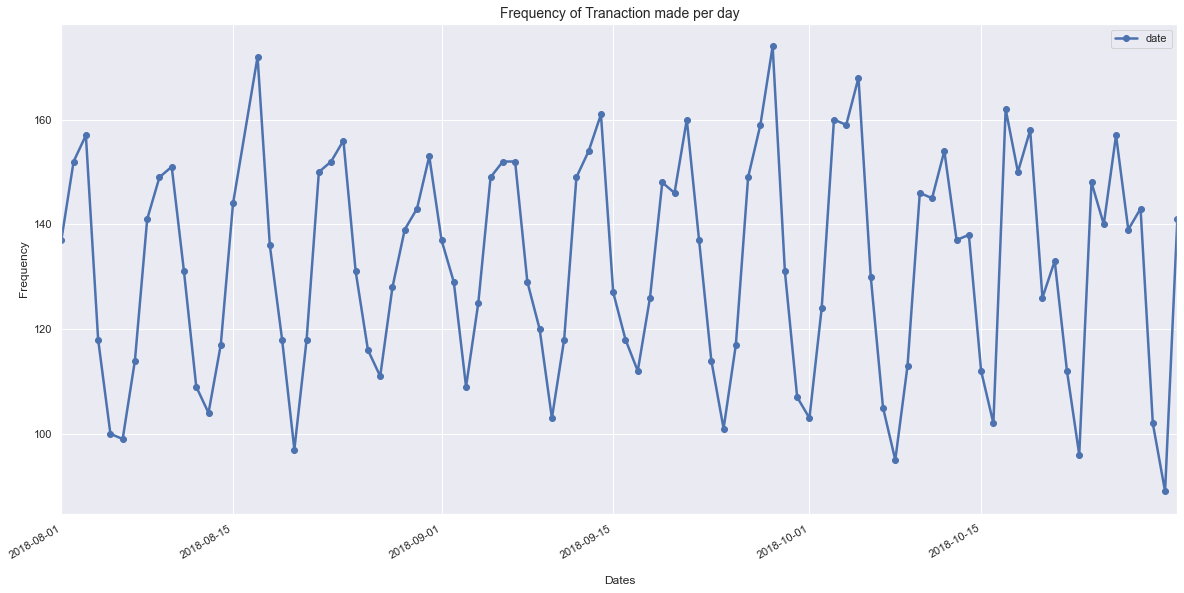

In [391]:
df['date'].value_counts(sort=True).plot(kind='line',linewidth=2.5,linestyle='-',marker='o',figsize=(20, 10))
plt.xlabel('\nDates')
plt.ylabel('\nFrequency')
plt.title('Frequency of Tranaction made per day',fontdict = {'fontsize' : 14})
plt.legend()
plt.grid(True)
plt.show()

# Task 2: Predictive Analytics

For this task, you’ll likely need to use statistical software such as R, SAS, or Python.

Using the same transaction dataset, identify the annual salary for each customer

Explore correlations between annual salary and various customer attributes (e.g. age). These attributes could be those that are readily available in the data (e.g. age) or those that you construct or derive yourself (e.g. those relating to purchasing behaviour). Visualise any interesting correlations using a scatter plot.

Build a simple regression model to predict the annual salary for each customer using the attributes you identified above

How accurate is your model? Should ANZ use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes?

For a challenge: build a decision-tree based model to predict salary. Does it perform better? How would you accurately test the performance of this model?

In [392]:
data = df

In [393]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement', 'weekday', 'month_name'],
      dtype='object')

In [394]:
data['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [395]:
datasalaries = data[data['txn_description'] == 'PAY/SALARY'].groupby('customer_id').mean()

0.19932925225498482


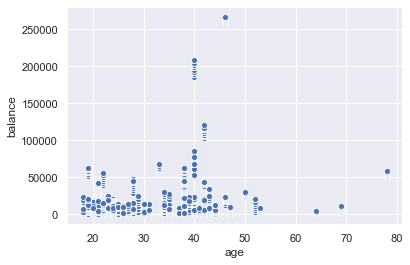

In [396]:
print(data['age'].corr(data['balance']))
sns.scatterplot(x=data.age, y=data.balance)

In [397]:
datasalaries.columns

Index(['card_present_flag', 'merchant_code', 'balance', 'age', 'amount'], dtype='object')

In [398]:
j =[]
for customer_id in df['customer_id']:
    j.append(int(datasalaries.loc[customer_id]['amount'].mean()))
df['annual_salary'] = j

In [399]:
df

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,weekday,month_name,annual_salary
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,Wednesday,August,1013
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,Wednesday,August,1013
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,Wednesday,August,1002
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,Wednesday,August,892
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,Wednesday,August,1013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit,Wednesday,October,1636
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit,Wednesday,October,2320
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit,Wednesday,October,4054
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit,Wednesday,October,1043


In [400]:
pred_sal = df[df['txn_description'] == 'PAY/SALARY']

In [401]:
pred_sal

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,weekday,month_name,annual_salary
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit,Wednesday,August,3903
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,...,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit,Wednesday,August,1626
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,...,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit,Wednesday,August,983
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,...,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit,Wednesday,August,1408
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,...,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit,Wednesday,August,1068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,posted,NaN,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,0.0,Antonio,...,2018-10-31T16:00:00.000+0000,1098.91,0e6cffb4401043c891ab7a50ec594208,Australia,CUS-1646621553,NaN,credit,Wednesday,October,1098
12000,posted,NaN,0,ACC-819621312,AUD,145.04 -37.85,PAY/SALARY,NaN,0.0,Michele,...,2018-10-31T17:00:00.000+0000,1158.15,ad13e06fffba4771b3c994f9147e68c0,Australia,CUS-1271030853,NaN,credit,Wednesday,October,1158
12001,posted,NaN,0,ACC-2920611728,AUD,144.96 -37.76,PAY/SALARY,NaN,0.0,Tyler,...,2018-10-31T17:00:00.000+0000,1043.12,14a1604e6ead4b54b65d7a28ec546a69,Australia,CUS-1388323263,NaN,credit,Wednesday,October,1043
12003,posted,NaN,0,ACC-1799207998,AUD,150.68 -33.79,PAY/SALARY,NaN,0.0,Susan,...,2018-10-31T17:00:00.000+0000,1395.49,cd1b1dea1d2f43e882d3499b3717d23b,Australia,CUS-164374203,NaN,credit,Wednesday,October,1395


-0.13853825855042667


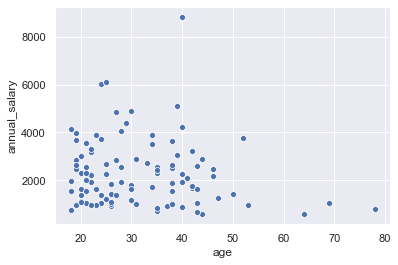

In [402]:
print(data.age.corr(pred_sal.annual_salary))
sns.scatterplot(x=pred_sal.age, y=pred_sal.annual_salary)

In [403]:
pred_sal = pred_sal.filter(['gender','movement','mercahnt_code','balance','age','amount','annual_salary'])

In [404]:
pred_sal = pred_sal.reset_index()
del pred_sal['index']
pred_sal

,gender,movement,balance,age,amount,annual_salary
0,M,credit,8342.11,23,3903.95,3903
1,F,credit,2040.58,23,1626.48,1626
2,M,credit,3158.51,22,983.36,983
3,M,credit,2517.66,24,1408.08,1408
4,F,credit,2271.79,43,1068.04,1068
...,...,...,...,...,...,...
878,M,credit,9378.51,26,1098.91,1098
879,F,credit,3440.01,30,1158.15,1158
880,M,credit,11381.44,69,1043.12,1043
881,F,credit,11454.52,20,1395.49,1395


In [405]:
pred_sal.corr()

,balance,age,amount,annual_salary
balance,1.000000,0.194956,0.287501,0.287501
age,0.194956,1.000000,-0.138594,-0.138538
amount,0.287501,-0.138594,1.000000,1.000000
annual_salary,0.287501,-0.138538,1.000000,1.000000


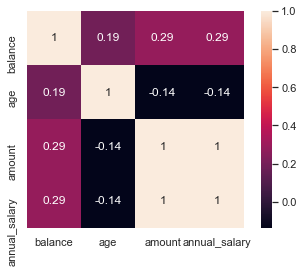

In [406]:
ax = sns.heatmap(pred_sal.corr(), annot=True, square = True)

In [421]:
X = pred_sal.drop('annual_salary',axis = 1)
y = pred_sal['annual_salary']

In [422]:
print(X.shape, y.shape)

(883, 5) (883,)


### Converting catogorical variables

In [423]:
dummies_1 = pd.get_dummies(X.gender)
dummies_2 = pd.get_dummies(X.movement)

In [424]:
X = pd.concat([X,dummies_1,dummies_2],axis='columns')

In [425]:
X

,gender,movement,balance,age,amount,F,M,credit
0,M,credit,8342.11,23,3903.95,0,1,1
1,F,credit,2040.58,23,1626.48,1,0,1
2,M,credit,3158.51,22,983.36,0,1,1
3,M,credit,2517.66,24,1408.08,0,1,1
4,F,credit,2271.79,43,1068.04,1,0,1
...,...,...,...,...,...,...,...,...
878,M,credit,9378.51,26,1098.91,0,1,1
879,F,credit,3440.01,30,1158.15,1,0,1
880,M,credit,11381.44,69,1043.12,0,1,1
881,F,credit,11454.52,20,1395.49,1,0,1


In [429]:
X=X.drop(['gender','movement'],axis=1)

In [430]:
X

,balance,age,amount,F,M,credit
0,8342.11,23,3903.95,0,1,1
1,2040.58,23,1626.48,1,0,1
2,3158.51,22,983.36,0,1,1
3,2517.66,24,1408.08,0,1,1
4,2271.79,43,1068.04,1,0,1
...,...,...,...,...,...,...
878,9378.51,26,1098.91,0,1,1
879,3440.01,30,1158.15,1,0,1
880,11381.44,69,1043.12,0,1,1
881,11454.52,20,1395.49,1,0,1


In [431]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

In [432]:
#X_le = X
#X_le.gender = le.fit_transform(X.gender)

In [433]:
#X.movement = le.fit_transform(pred_sal_le.movement)

In [434]:
#X

In [435]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3)

# Linear Regression

In [436]:
from sklearn.linear_model import LinearRegression

# Setting up random seed
np.random.seed(42)

# Instantiate the model
model_lin = LinearRegression()

# Fit the model
model_lin.fit(X_train , y_train)

# Making predictions
y_lin_preds = model_lin.predict(X_test)

# Model Score 
model_lin.score(X_test , y_test)

0.9999999525494623

# Decision Tree

In [437]:
# Importing the library
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)

# Instantiate the model
model_reg = DecisionTreeRegressor()
model_reg.fit(X_train , y_train)

# Score of the model
model_reg.score(X_test , y_test)

# Make predictions 
y_preds = model_reg.predict(X_test)

In [438]:
model_reg.score(X_test , y_test)

0.9917923576359601